In [1]:
!pwd

/home/hza/plasticine/plb/prog


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# shared across tasks
from plb.optimizer.optim import Adam
from plb.engine.taichi_env import TaichiEnv
from plb.config.default_config import get_cfg_defaults, CN
# from toolbox.control_soft import setup_finger

import os
import cv2
import numpy as np
import taichi as ti
import matplotlib.pyplot as plt


[Taichi] mode=release
[Taichi] preparing sandbox at /tmp/taichi-ktfpcmzl
[Taichi] version 0.7.21, llvm 10.0.0, commit 15465fb6, linux, python 3.9.5
[Taichi] Starting on arch=cuda


In [4]:
from yacs.config import CfgNode
from plb.config import load
cfg = load("../envs/env_configs/pinch.yml")
print(cfg)
cfg.defrost()
cfg.SIMULATOR.quality = 2
cfg.freeze()
env = TaichiEnv(cfg, nn=False, loss=False)
env.initialize()
state = env.get_state()

ENV:
  loss:
    soft_contact: False
    target_path: envs/assets/Pinch3D-v1.npy
    weight:
      contact: 1
      density: 10
      sdf: 10
  n_observed_particles: 200
PRIMITIVES: [{'shape': 'Sphere', 'radius': 0.04, 'init_pos': '(0.5, 0.35, 0.5)', 'color': '(0.8, 0.8, 0.8)', 'friction': 0.9, 'lower_bound': '(0.1, 0.1, 0.1)', 'upper_bound': '(0.9, 0.9, 0.9)', 'action': {'dim': 3, 'scale': '(0.02, 0.02, 0.02)'}}]
RENDERER:
  bake_size: 6
  camera_pos: (0.5, 2.5, 2.2)
  camera_rot: (0.8, 0.0)
  dx: 0.006666666666666667
  image_res: (512, 512)
  light_direction: (2.0, 1.0, 0.7)
  max_num_particles: 1000000
  max_ray_depth: 2
  sdf_threshold: 0.20720000000000002
  spp: 50
  target_res: (64, 64, 64)
  use_directional_light: False
  use_roulette: False
  voxel_res: (168, 168, 168)
SHAPES: [{'shape': 'box', 'width': '(0.2, 0.2, 0.2)', 'init_pos': '(0.5, 0.1, 0.5)', 'n_particles': 6000, 'color': '((150<<8)+ (150<<16))'}]
SIMULATOR:
  E: 5000.0
  dim: 3
  dtype: float64
  gravity: (0.0, -1.0,

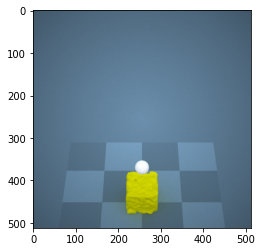

3


In [5]:
env.set_state(**state)
taichi_env = env
env.render('plt')
action_dim = taichi_env.primitives.action_dim
print(action_dim)

In [15]:
i = 0
while i < 101:
    env.set_state(**state)
    taichi_env = env
    # env.primitives.primitives[0].action_scale[None] = (0.03, 0.03, 0.03)   # 0.03, 0.03*0.05,0.
    env.primitives.primitives[0].set_state(0, [0.5, 0.35, 0.55])   # working setting [0.5, 0.130, 0.5]

    action_dim = taichi_env.primitives.action_dim
    horizon = 50
    if (i+1) % 10 == 0:
        print(i+1)
    if i // 10 == 0:
        action = np.random.uniform(-0.3, 0.3, size=(horizon, action_dim))
        action[:, 1] = -0.3
    elif i // 10 == 1:
        action = np.zeros((horizon, action_dim))
        action[:10, 0] = np.random.uniform(-0.9, -0.7)
        action[10:22, 1] = np.random.uniform(-1., -0.8)
        action[22:, :] = np.random.uniform(-0.4, 0.4, size=(horizon-22, action_dim))
        action[22:, 0] = 0.3
    elif i // 10 == 2:
        action = np.zeros((horizon, action_dim))
        action[:10, 0] = np.random.uniform(0.7, 0.9)
        action[10:22, 1] = np.random.uniform(-1., -0.8)
        action[22:, :] = np.random.uniform(-0.4, 0.4, size=(horizon-22, action_dim))
        action[22:, 0] = -0.3
    elif i // 10 == 3:
        action = np.zeros((horizon, action_dim))
        action[:10, 2] = np.random.uniform(0.5, 0.7)
        action[10:22, 1] = np.random.uniform(-1., -0.8)
        action[22:, :] = np.random.uniform(-0.4, 0.4, size=(horizon-22, action_dim))
        action[22:, 2] = -0.3
    elif i // 10 == 4:
        action = np.zeros((horizon, action_dim))
        action[:10, 2] = np.random.uniform(-0.9, -0.6)
        action[10:22, 1] = np.random.uniform(-1., -0.8)
        action[22:, :] = np.random.uniform(-0.4, 0.4, size=(horizon-22, action_dim))
        action[22:, 2] = 0.3


    imgs = []

    import tqdm
    for idx, act in enumerate(tqdm.tqdm(action, total=horizon)):
        #state = env.get_state()
        #try:
        obs = env.step(act)
        #except:
        #    data = [state, act]
        #    print('bug')
        #    raise ValueError
    i += 1


100%|██████████| 50/50 [00:07<00:00,  7.04it/s]


10


100%|██████████| 50/50 [00:07<00:00,  7.07it/s]


20


100%|██████████| 50/50 [00:07<00:00,  7.06it/s]


30


100%|██████████| 50/50 [00:07<00:00,  6.98it/s]


40


100%|██████████| 50/50 [00:07<00:00,  7.06it/s]


50


100%|██████████| 50/50 [00:07<00:00,  7.06it/s]


60


100%|██████████| 50/50 [00:07<00:00,  7.06it/s]


70


100%|██████████| 50/50 [00:13<00:00,  3.63it/s]


80


100%|██████████| 50/50 [00:09<00:00,  5.48it/s]


90


 92%|█████████▏| 46/50 [00:06<00:00,  7.05it/s]


KeyboardInterrupt: 

In [16]:
import pickle
with open('/home/hza/xuhuazhe/PlasticineLab/plb/algorithms/nan.pkl', 'rb') as f:
    inp, ac = pickle.load(f)

In [26]:
env.set_state(**inp)
env.step(ac)